## Introduction

The study of stellar compositions and the detection of elements within stars is crucial for understanding the formation, evolution, and lifecycle of celestial objects. Spectroscopy, the analysis of light spectrum emitted or absorbed by matter, is a powerful tool in this field, providing insights into the chemical and physical properties of stars.

This project focuses on the spectroscopic analysis of O and B-type stars, neutron stars, and white dwarfs. These stellar classes are significant due to their unique characteristics and the role they play in the cosmos. O and B-type stars are massive, hot, and young stars, often associated with star-forming regions. Neutron stars and white dwarfs represent the end stages of stellar evolution, providing a glimpse into the future of stars like our Sun.

A key aspect of this project is the detection and analysis of helium (He) and oxygen (O) in these stars. These elements are fundamental to the study of stellar atmospheres and evolution. Additionally, the formation of heliox (OHe) molecules from helium and oxygen in these environments is of particular interest, as it provides insights into chemical processes occurring in extreme conditions.

Utilizing a range of tools and libraries, including SDSS, Astropy, Astroquery, and Specutils, this project aims to analyze spectroscopic data to detect and quantify the presence of helium and oxygen. By examining the spectra, we can identify the characteristic lines of these elements and their compounds, allowing for a deeper understanding of the stellar environments.

The methodology involves the acquisition of spectral data from various sources, followed by filtering and grouping the data based on the classification of stellar objects. Advanced data visualization techniques are employed to present the findings, highlighting the spectral lines corresponding to helium, oxygen, and heliox.

This project not only contributes to the field of astrophysics by enhancing our understanding of stellar compositions but also serves as a foundational analysis for further research and scientific publications. The results obtained from this study have the potential to inform models of stellar evolution and the chemical enrichment of the universe.

## Required Libraries

To facilitate the spectroscopic analysis and data visualization for this project, several Python libraries are installed. Each of these libraries serves a specific purpose in the analysis workflow:

- `sdss`: The **Sloan Digital Sky Survey (SDSS)** library provides tools for accessing and analyzing data from the SDSS. This includes obtaining spectra, images, and other astronomical data, which are crucial for studying the compositions of stars.

- `astropy`: **Astropy** is a comprehensive library for astronomy in Python. It provides core functionality and common tools needed for astronomical data analysis, including units and coordinates handling, time and date manipulations, and access to standard astronomical catalogs.

- `astroquery`: **Astroquery** is an astropy-affiliated package that provides a set of tools for querying astronomical databases. It allows users to access a variety of data sources, such as the SDSS, Simbad, and VizieR, enabling the retrieval of observational data necessary for detailed analysis.

- `ipyaladin`: **Ipyaladin** is a Jupyter notebook widget for visualizing and exploring astronomical images and catalogs. It provides an interactive interface to the Aladin Lite viewer, allowing users to overlay different data sets and perform interactive exploration of the sky.

- `specutils`: **Specutils** is a library within the Astropy project designed for working with astronomical spectroscopic data. It provides tools for reading, manipulating, and analyzing spectra, including tasks such as continuum fitting, line identification, and spectral arithmetic.

- `pyautogui`: **PyAutoGUI** is a library used for programmatically controlling the mouse and keyboard. While not directly related to astronomical analysis, it can be useful for automating repetitive tasks, such as downloading large amounts of data or performing batch processing of files.

These libraries collectively support the comprehensive analysis and visualization of spectroscopic data, enabling the detection and study of helium, oxygen, and their compounds in various types of stars.


In [1]:
!pip install sdss
!pip install astropy
!pip install astroquery
!pip install ipyaladin
!pip install specutils
!pip install pyautogui

Initially, it is necessary to designate specific coordinates from which to conduct a targeted search for celestial objects. To accomplish this, the parameter fov=10 is employed, delineating a field of view spanning 10 degrees around the specified coordinates. These coordinates adhere to galactic coordinates and necessitate validation against the Sloan Digital Sky Survey (SDSS) database. Verification involves querying the SDSS database via its web interface to ascertain the presence of these coordinates within its repository. Upon confirmation, a catalogue of object identifiers corresponding to the queried region can be retrieved for subsequent analysis.

For conducting such queries, the SDSS SkyServer offers a user-friendly web tool enabling searches either by input coordinates or specific object identifiers. This interface can be accessed at: SDSS SkyServer.

This procedural approach facilitates systematic exploration of the targeted celestial region and enables compilation of an inventory of identified objects, thereby supporting further analytical procedures in subsequent stages of research or investigation.
<br><br>
The SDSS database accessible at: [SDSS SkyServer](https://skyserver.sdss.org/dr18/VisualTools/quickobj?ra=220.31805&dec=-1.16213)

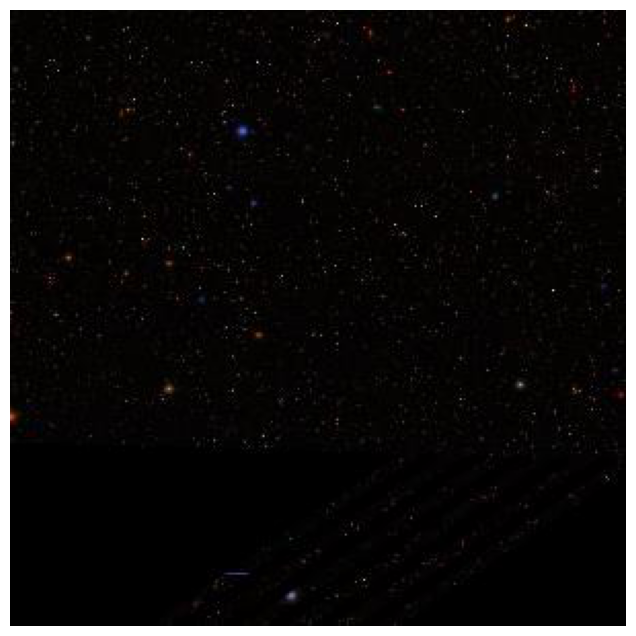

In [2]:
import sdss
ra = 220.31805
dec = -1.16213
reg = sdss.Region(ra, dec, fov=10, opt='')
reg.show(figsize=(8,8))

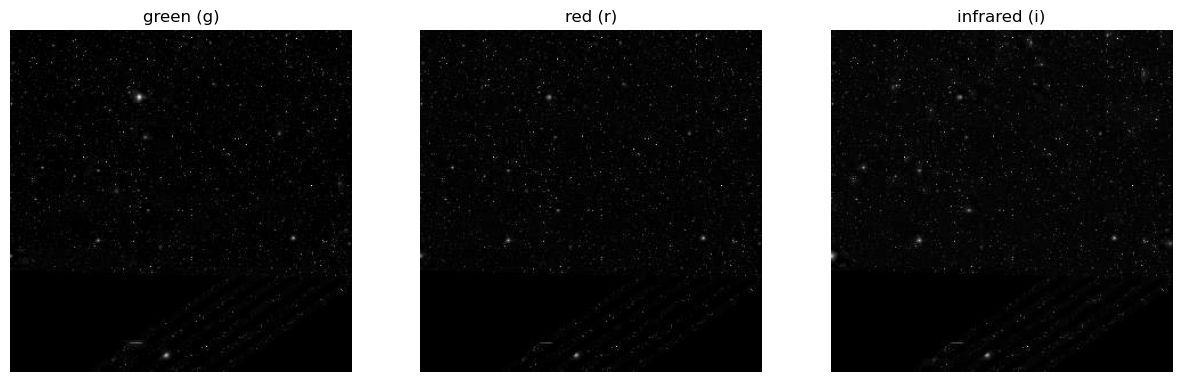

In [3]:
reg.show3b(figsize=(15,8))

The provided code snippet retrieves astronomical data and filters out data entries categorized as galaxies and quasars (QSOs), as they are not relevant to the current analysis or inquiry. This targeted filtering ensures that the subsequent data handling focuses exclusively on the classes of interest, optimizing the efficiency of the analysis process.

In [4]:
import pandas as pd

# Set display option to show all rows
pd.set_option('display.max_rows', None)
df_obj = reg.nearest_objects()
df_sp = reg.nearest_spects()

df_sp_filtered = df_sp[(df_sp['class'] != 'GALAXY') & (df_sp['class'] != 'QSO')]

# Group by class
grouped_by_class = df_sp_filtered.groupby('class')

# Iterate over each group and print
for class_name, group_data in grouped_by_class:
    print(f"Class: {class_name}")
    print(group_data)
    print()

Class: STAR
                   objID            specObjID   distance         ra       dec  \
0    1237648702982652267  1035917015186958336   1.716200  220.30585 -1.136258   
1    1237648702982586519   345665867830290432   2.517458  220.27739 -1.172517   
4    1237648702982587492  4533089168323268608   4.983841  220.24112 -1.193497   
11   1237648702982586622   345664493440755712   6.850885  220.21182 -1.120213   
12   1237648702982587092  4528487162858196992   7.286355  220.19683 -1.169830   
14   1237648702982717576   345653773202384896   7.982362  220.44977 -1.143253   
16   1237655499745525910  4528474518474477568   8.230859  220.40580 -1.267591   
18   1237648702982717444  4528475617986105344   8.707121  220.44466 -1.233097   
27   1237655693550092311  4528476717497733120  10.295123  220.34370 -0.992472   
30   1237648702982586753  1034869730327947264  11.083745  220.14160 -1.216936   
34   1237655693549962043  4533092466858151936  11.536448  220.17469 -1.033971   
44   12376554997

In our research, we focus on identifying specific types of astronomical objects, such as O and B-type stars, white dwarfs (WD), and neutron stars, including magnetars and pulsars. Upon locating these objects, we must verify the availability of their spectral data in the Sloan Digital Sky Survey (SDSS) database. Only after confirming the presence of spectral data can we proceed with the spectroscopic analysis of these objects.

Another method you can utilize involves accessing the [CDS Portal's site](http://cdsportal.u-strasbg.fr/?target=). Here, you can enter the name of the object of interest, sourced from other databases or identified through research. The portal provides the galactic coordinates of the object, which can then be used for a search on the SDSS site.

The CDS Portal integrates resources such as Simbad and NED, offering comprehensive information about the object's type and other relevant data. Additionally, Aladin Lite can be employed within the project to visualize and manipulate the coordinates obtained.

However, some challenges may arise. For instance, the coordinates provided by the SDSS site may not be in the correct format or may not be accepted in galactic coordinates. In such cases, you can find alternative coordinate formats for the object on the CDS Portal through NED.

In order to locate the object below, the process involved first identifying the relevant subclasses that were of interest. Subsequently, the galactic coordinates associated with these subclasses were checked. This approach ensured that the search was conducted efficiently and effectively using specified astronomical parameters and coordinates in galactic format.

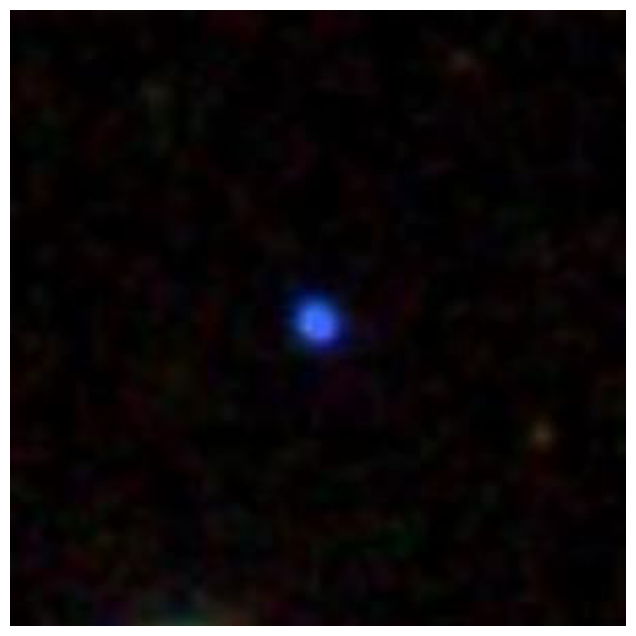

In [5]:
ra = 319.85235574
dec = -0.83209788  
reg = sdss.Region(ra, dec, fov=0.01, opt='')
reg.show(figsize=(8,8))

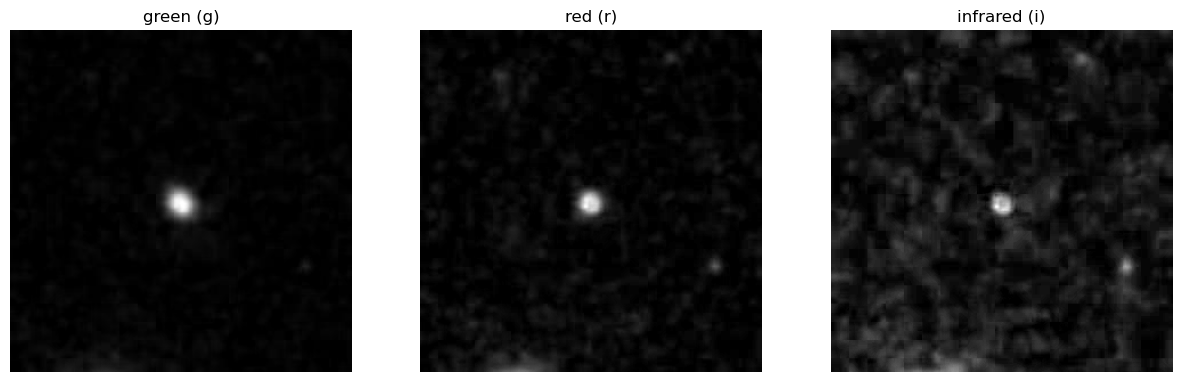

In [6]:
reg.show3b(figsize=(15,8))

To locate the object, I began by identifying specific subclasses of interest. Subsequently, I checked the galactic coordinates associated with these subclasses. This method ensured an efficient search process using predefined astronomical parameters in galactic coordinates.

Additionally, I needed to verify the object on different datasets due to potential image quality limitations on SDSS. Therefore, I specifically utilized SDSS for spectrum data only. I conducted a coordinate check using the Aladin site ([Aladin Lite](https://aladin.cds.unistra.fr/AladinLite/)), entering the coordinates 319.85235574, -0.83209788. This allowed me to find the object's name and access the respective survey information available on the sit.


In [23]:
from astroquery.simbad import Simbad
import ipyaladin as ipyal

aladin = ipyal.Aladin(target='GALEX J211924.5-004955', fov=0.05)
aladin.survey="CDS/P/DES-DR2/ColorIRG"
aladin

Aladin(fov=0.05, init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opac…

I retrieved additional data from Simbad to verify the object's type. This step was crucial as SDSS may not always have the most current information. The CDS Portal, Simbad, and associated databases provide up-to-date information on astronomical objects, ensuring accuracy and reliability in classifications and other pertinent details.


In [8]:
# Initialize Simbad
simbad = Simbad()
simbad.add_votable_fields('sptype')
simbad.add_votable_fields('otype')

# Query Simbad for spectral type
result_table = simbad.query_object("GALEX J211924.5-004955")

# Print result
result_table.pprint(show_unit=True)

# Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

# Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'][0])

# Object Type
print("\nObject Type")
print(result_table['OTYPE'][0])


       MAIN_ID               RA      ...    OTYPE    SCRIPT_NUMBER_ID
                          "h:m:s"    ...                             
---------------------- ------------- ... ----------- ----------------
GALEX J211924.5-004955 21 19 24.5642 ... HotSubdwarf                1

Coordinates
21 19 24.5642
-00 49 55.596

Spectral Type
sdO

Object Type
HotSubdwarf


I reviewed all pertinent information about the star here, including obtaining the spectrum ID (specObjID) for further analysis.

In [9]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)
df_obj = reg.nearest_objects()
df_sp = reg.nearest_spects()

df_sp_filtered = df_sp[(df_sp['class'] != 'GALAXY') & (df_sp['class'] != 'QSO')]

# Group by class
grouped_by_class = df_sp_filtered.groupby('class')

# Iterate over each group and print
for class_name, group_data in grouped_by_class:
    print(f"Class: {class_name}")
    print(group_data)
    print()

Class: STAR
                 objID            specObjID  distance         ra       dec  \
0  1237663456703873401  4719831874868105216  0.000295  319.85236 -0.832095   

  class        subClass        u         g         r         i         z  \
0  STAR  O8/O9 (167771)  18.2896  18.56672  19.07792  19.41725  19.78733   

   redshift      zErr zWarning  
0 -0.000398  0.000018        0  



In [10]:
# To obtain the spectrum, you have two options: automated retrieval from the SDSS site or manual download.
try:
    sp = sdss.SpecObj(4719831874868105216)
    sp.download_spec()
except Exception as e:
    pass  # Ignore any errors if the spectrum is already downloaded

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u

In [12]:
hdul = fits.open('spec-0986-52443-0037.fits')
hdul.info()

Filename: spec-0986-52443-0037.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3831R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B1-00015686-00015690-00015691    1 BinTableHDU    146   2044R x 7C   [E, E, E, J, E, E, E]   
  5  B1-00015687-00015690-00015691    1 BinTableHDU    146

In [13]:
cols1 = hdul[1].columns
print(cols1)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [14]:
data1 = hdul[1].data
 
wavelength = 10 ** data1.field('loglam')
flux = data1.field('flux')
model = data1.field('model')
 
print('Wavelength :', wavelength)
print('Flux (raw) :', flux)
print('Model (fit):', model)

Wavelength : [3807.1504 3808.0261 3808.9043 ... 9191.785  9193.905  9196.0205]
Flux (raw) : [26.142017  25.85088   24.228664  ...  2.344492   0.8943321  0.7944161]
Model (fit): [ 7.1247563 30.624987  26.423681  ...  1.6424102  1.5644046  1.6308256]


In [15]:
wavelength = wavelength * u.Unit('AA')
flux = flux * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')
model = model * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

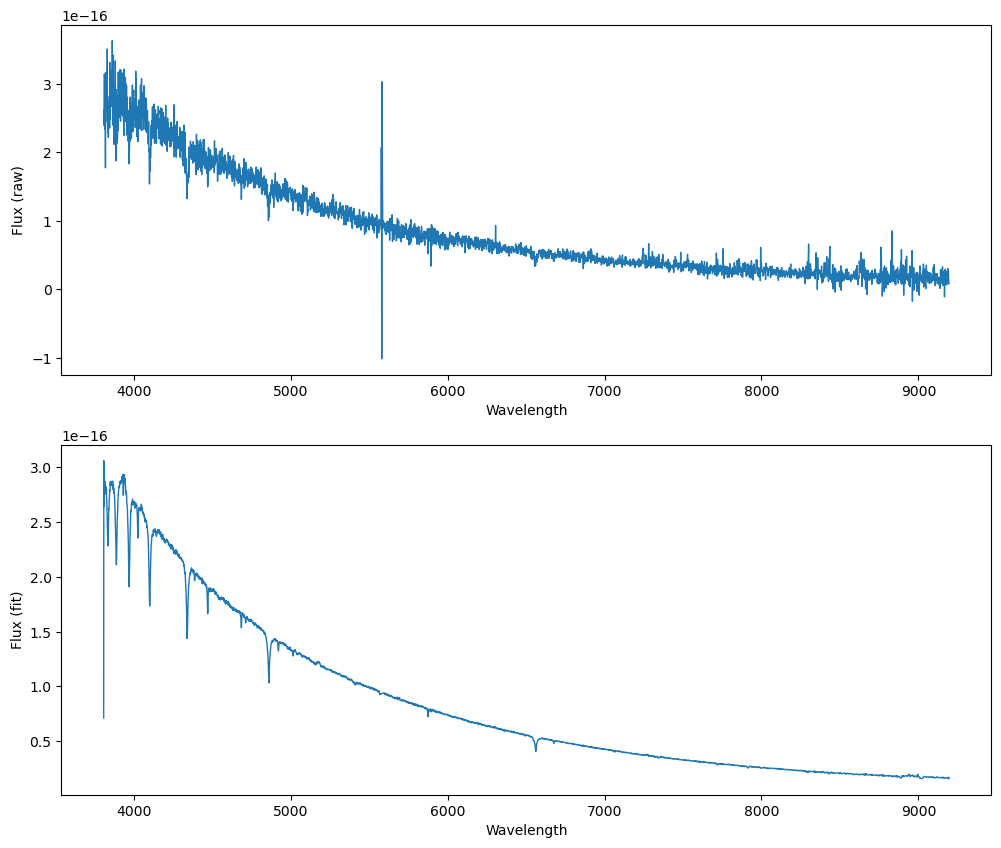

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
 
ax[0].plot(wavelength, flux, linewidth=1)
ax[1].plot(wavelength, model, linewidth=1)
 
ax[0].set_xlabel('Wavelength')
ax[1].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux (raw)')
ax[1].set_ylabel('Flux (fit)')
 
plt.show()

In [17]:
cols3 = hdul[3].columns
data3 = hdul[3].data
 
print(cols3)

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'LINENAME'; format = '13A'
    name = 'LINEWAVE'; format = 'D'
    name = 'LINEZ'; format = 'E'
    name = 'LINEZ_ERR'; format = 'E'
    name = 'LINESIGMA'; format = 'E'
    name = 'LINESIGMA_ERR'; format = 'E'
    name = 'LINEAREA'; format = 'E'
    name = 'LINEAREA_ERR'; format = 'E'
    name = 'LINEEW'; format = 'E'
    name = 'LINEEW_ERR'; format = 'E'
    name = 'LINECONTLEVEL'; format = 'E'
    name = 'LINECONTLEVEL_ERR'; format = 'E'
    name = 'LINENPIXLEFT'; format = 'J'
    name = 'LINENPIXRIGHT'; format = 'J'
    name = 'LINEDOF'; format = 'E'
    name = 'LINECHI2'; format = 'E'
)


In [18]:
line_names = data3.field('LINENAME')
line_waves = data3.field('LINEWAVE')
line_z = data3.field('LINEZ')
line_area = data3.field('LINEAREA')

df = pd.DataFrame(
    {'name': [i for i in line_names],
     'lam_rest': [i for i in line_waves],
     'z': [i for i in line_z],
     'area': [i for i in line_area]
     }
)

df = df[abs(df['area']) > 0]  # corrected the syntax here
print(df)


             name     lam_rest         z       area
8   [Ne_III] 3868  3869.856797 -0.000624   2.699157
9       H_epsilon  3890.151080 -0.000624  11.401403
10  [Ne_III] 3970  3971.123187 -0.000624  -1.896767
11        H_delta  4102.891631 -0.000624  -0.260181
12        H_gamma  4341.684313 -0.000624  -0.409328
13   [O_III] 4363  4364.435300 -0.000624   1.052052
14     He_II 4685  4686.991444 -0.000624 -10.461438
15         H_beta  4862.682994 -0.000624   2.812752
16   [O_III] 4959  4960.294901 -0.000625   0.400002
17   [O_III] 5007  5008.239638 -0.000624   1.211605
18     He_II 5411  5413.024423 -0.000624  -1.454262
19     [O_I] 5577  5578.887704 -0.000623  11.416090
20     [O_I] 6300  6302.046377 -0.000623  -1.263358
21   [S_III] 6312  6313.805533 -0.000625   2.219240
22     [O_I] 6363  6365.535420 -0.000624   0.585373
23    [N_II] 6548  6549.858929 -0.000624  -1.962796
24        H_alpha  6564.613894 -0.000625  -2.311012
25    [N_II] 6583  6585.268445 -0.000625   1.604968
26    [S_II]

In [19]:
df['lam_obs'] = df['lam_rest'] * (1 + df['z'])

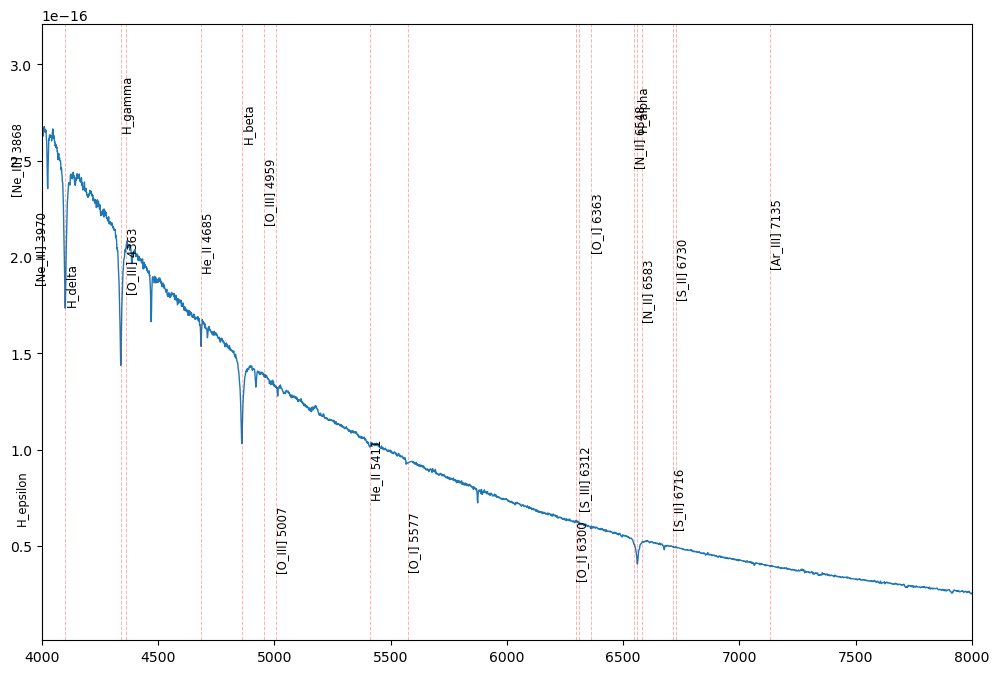

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
 
label_y = np.random.uniform(
    low=model.min().value*1.1,
    high=model.max().value*0.9,
    size=len(df)
    )
 
ax.plot(wavelength, model, linewidth=1)
 
for i in range(len(df)):
    ax.axvline(x=df['lam_obs'].iloc[i],
               color='r',
               alpha=0.3,
               label=df['name'].iloc[i],
               ls='--',
               lw=0.7)
     
    ax.text(x=df['lam_obs'].iloc[i] ,
            y=label_y[i],
            s=df['name'].iloc[i],
            fontsize='small',
            rotation=90)
 
plt.xlim(4000, 8000)
plt.show()

In [21]:
from bokeh.plotting import figure, show
from bokeh.models.tools import HoverTool
from bokeh.models import Span, Label
 
p = figure(title="Spectrum",
           sizing_mode="stretch_width",
           x_range=(4000, 8000),
           tools=[HoverTool(), 'pan', 'wheel_zoom', 'reset'],
           tooltips="lambda=@x{0.000} | flux=@y",
           x_axis_label="Wavelength", y_axis_label="Flux")
 
p.line(wavelength, model, line_color="blue", line_width=1)
 
for i in range(len(df)):
    ver = Span(location=df['lam_obs'].iloc[i],
               dimension='height',
               line_color='red',
               line_dash='dashed',
               line_width=1)
     
    p.add_layout(ver)
     
    lbl = Label(x=df['lam_obs'].iloc[i],
                y=label_y[i],
                text=df['name'].iloc[i])
     
    p.add_layout(lbl)
     
show(p)

Similar procedures apply to another object for which I have identified a spectrum.

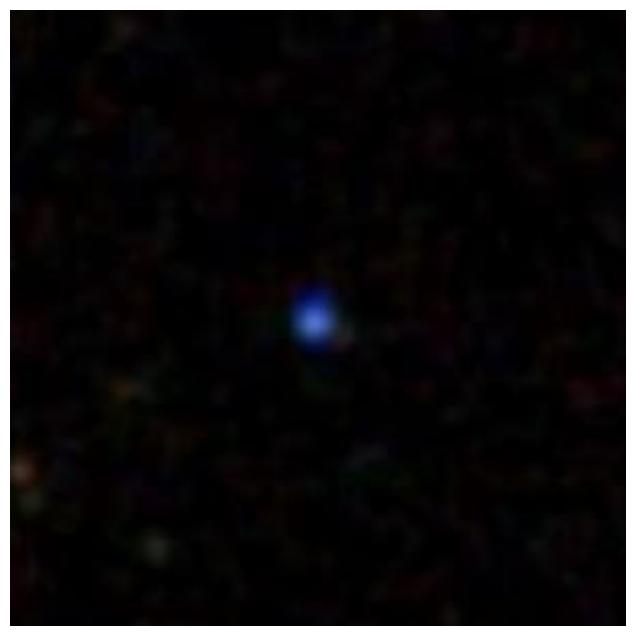

In [22]:
ra = 220.21183042
dec = -1.12020912  
reg = sdss.Region(ra, dec, fov=0.01, opt='')
reg.show(figsize=(8,8))

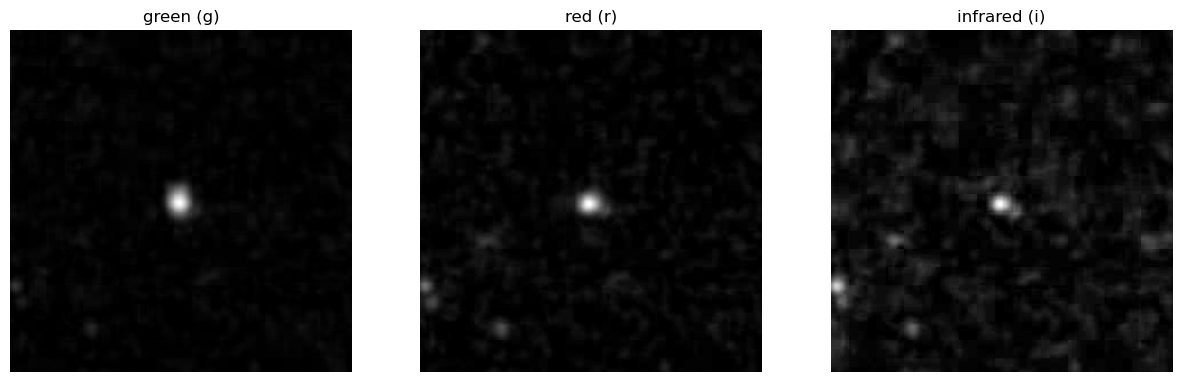

In [23]:
reg.show3b(figsize=(15,8))

In [24]:
aladin = ipyal.Aladin(target='2QZ J144050.8-010713', fov=0.05)
aladin.survey="CDS/P/HSC/DR2/wide/color-i-r-g"
aladin

Aladin(fov=0.05, init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opac…

In [25]:
# Initialize Simbad
simbad = Simbad()
simbad.add_votable_fields('sptype')
simbad.add_votable_fields('otype')

# Query Simbad for spectral type
result_table = simbad.query_object("2QZ J144050.8-010713")

# Print result
result_table.pprint(show_unit=True)

# Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

# Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'][0])

# Object Type
print("\nObject Type")
print(result_table['OTYPE'][0])


      MAIN_ID              RA           DEC      ...   OTYPE    SCRIPT_NUMBER_ID
                        "h:m:s"       "d:m:s"    ...                            
-------------------- ------------- ------------- ... ---------- ----------------
2QZ J144050.8-010713 14 40 50.8421 -01 07 12.788 ... WhiteDwarf                1

Coordinates
14 40 50.8421
-01 07 12.788

Spectral Type
DA2:

Object Type
WhiteDwarf


In [26]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)
df_obj = reg.nearest_objects()
df_sp = reg.nearest_spects()

df_sp_filtered = df_sp[(df_sp['class'] != 'GALAXY') & (df_sp['class'] != 'QSO')]

# Group by class
grouped_by_class = df_sp_filtered.groupby('class')

# Iterate over each group and print
for class_name, group_data in grouped_by_class:
    print(f"Class: {class_name}")
    print(group_data)
    print()

Class: STAR
                 objID           specObjID  distance         ra       dec  \
0  1237648702982586622  345664493440755712  0.000661  220.21182 -1.120213   

  class subClass         u         g         r         i         z  redshift  \
0  STAR       WD  19.96552  19.85559  20.26394  20.53186  20.61087 -0.000044   

       zErr zWarning  
0  0.000199        0  



In [27]:
sp = sdss.SpecObj(345664493440755712)
 
sp.download_spec()

In [28]:
hdul = fits.open('spec-0307-51663-0048.fits')
hdul.info()

Filename: spec-0307-51663-0048.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3842R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [29]:
cols1 = hdul[1].columns
print(cols1)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [30]:
data1 = hdul[1].data
 
wavelength = 10 ** data1.field('loglam')
flux = data1.field('flux')
model = data1.field('model')
 
print('Wavelength :', wavelength)
print('Flux (raw) :', flux)
print('Model (fit):', model)

Wavelength : [3804.522  3805.3972 3806.2727 ... 9208.736  9210.8545 9212.979 ]
Flux (raw) : [ 7.9151096   4.8617215   6.8412437  ...  1.5750273   0.78916156
 -0.6124616 ]
Model (fit): [-0.17213687  0.8523621  -1.2405819  ...  1.8332747   1.6493559
  1.0988398 ]


In [31]:
wavelength = wavelength * u.Unit('AA')
flux = flux * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')
model = model * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

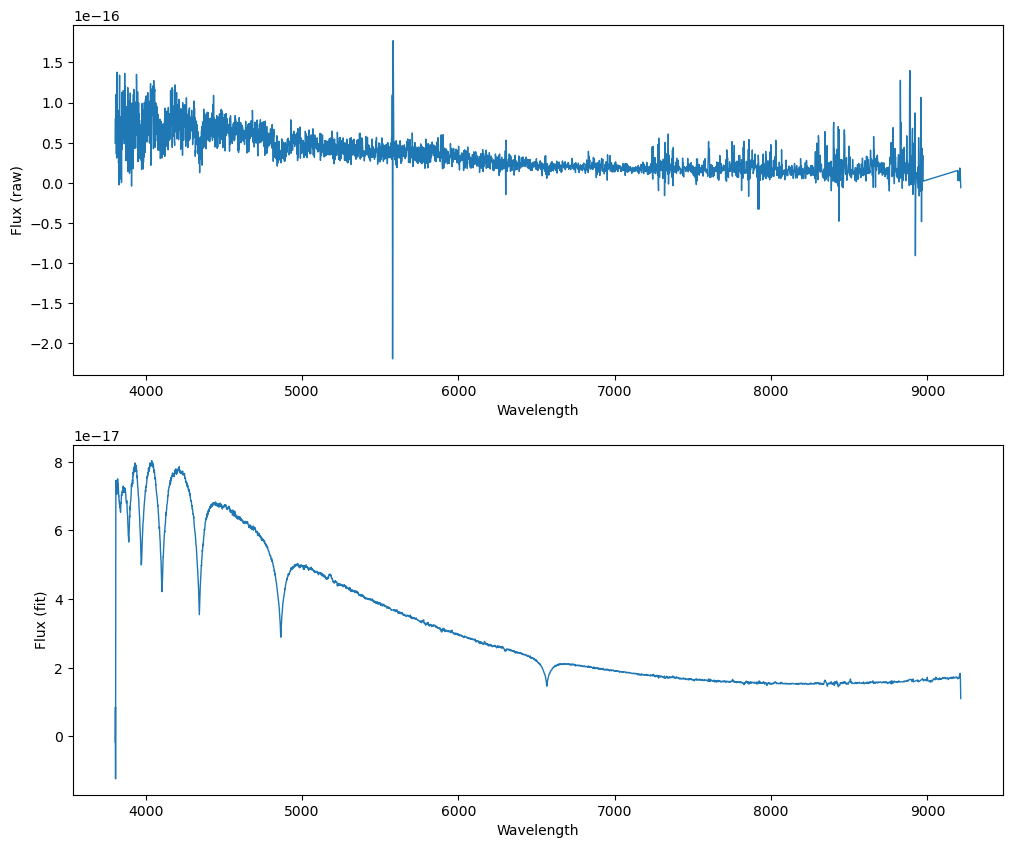

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
 
ax[0].plot(wavelength, flux, linewidth=1)
ax[1].plot(wavelength, model, linewidth=1)
 
ax[0].set_xlabel('Wavelength')
ax[1].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux (raw)')
ax[1].set_ylabel('Flux (fit)')
 
plt.show()

In [33]:
cols3 = hdul[3].columns
data3 = hdul[3].data
 
print(cols3)

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'LINENAME'; format = '13A'
    name = 'LINEWAVE'; format = 'D'
    name = 'LINEZ'; format = 'E'
    name = 'LINEZ_ERR'; format = 'E'
    name = 'LINESIGMA'; format = 'E'
    name = 'LINESIGMA_ERR'; format = 'E'
    name = 'LINEAREA'; format = 'E'
    name = 'LINEAREA_ERR'; format = 'E'
    name = 'LINEEW'; format = 'E'
    name = 'LINEEW_ERR'; format = 'E'
    name = 'LINECONTLEVEL'; format = 'E'
    name = 'LINECONTLEVEL_ERR'; format = 'E'
    name = 'LINENPIXLEFT'; format = 'J'
    name = 'LINENPIXRIGHT'; format = 'J'
    name = 'LINEDOF'; format = 'E'
    name = 'LINECHI2'; format = 'E'
)


In [34]:
line_names = data3.field('LINENAME')
line_waves = data3.field('LINEWAVE')
line_z = data3.field('LINEZ')
line_area = data3.field('LINEAREA')

df = pd.DataFrame(
    {'name': [i for i in line_names],
     'lam_rest': [i for i in line_waves],
     'z': [i for i in line_z],
     'area': [i for i in line_area]
     }
)

df = df[abs(df['area']) > 0]  # corrected the syntax here
print(df)

             name     lam_rest         z       area
8   [Ne_III] 3868  3869.856797  0.000094   2.292401
9       H_epsilon  3890.151080  0.000094   0.218176
10  [Ne_III] 3970  3971.123187  0.000094   0.954741
11        H_delta  4102.891631  0.000094  10.138201
12        H_gamma  4341.684313  0.000094  -4.030599
13   [O_III] 4363  4364.435300  0.000094   3.132345
14     He_II 4685  4686.991444  0.000094  -2.386272
15         H_beta  4862.682994  0.000094   0.291128
16   [O_III] 4959  4960.294901  0.000093  -1.267653
17   [O_III] 5007  5008.239638  0.000094  -3.839721
18     He_II 5411  5413.024423  0.000094   1.326387
20     [O_I] 6300  6302.046377  0.000095  -8.305104
21   [S_III] 6312  6313.805533  0.000094  -2.982300
22     [O_I] 6363  6365.535420  0.000094  -0.219938
23    [N_II] 6548  6549.858929  0.000094   1.764575
25    [N_II] 6583  6585.268445  0.000093  -0.709550
26    [S_II] 6716  6718.294208  0.000094  -1.617051
27    [S_II] 6730  6732.678076  0.000094  -0.605298
28  [Ar_III]

In [35]:
df['lam_obs'] = df['lam_rest'] * (1 + df['z'])

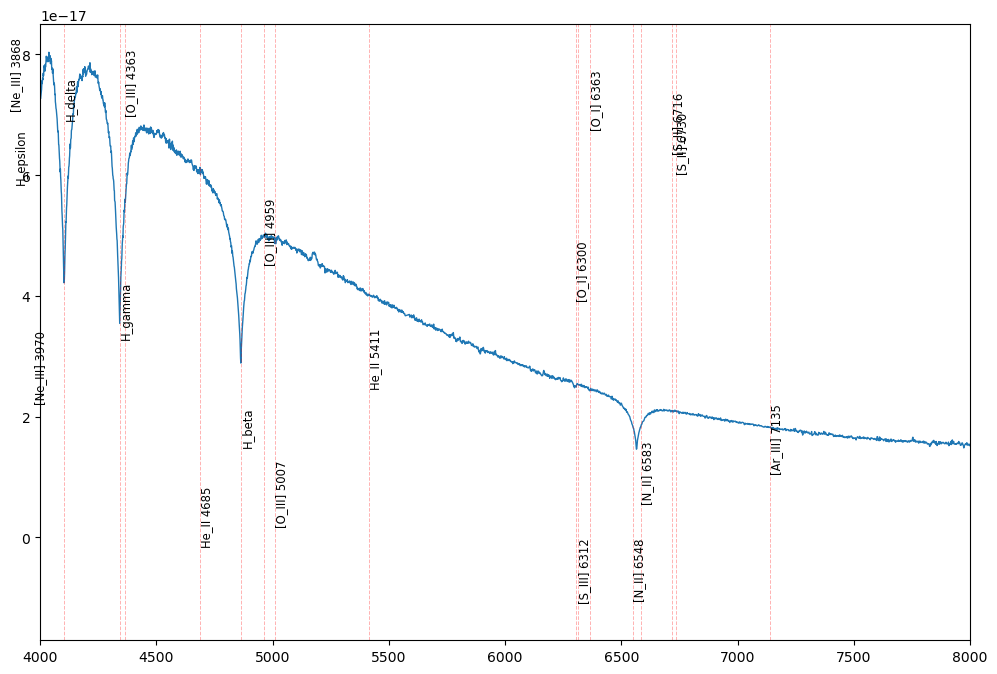

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
 
label_y = np.random.uniform(
    low=model.min().value*1.1,
    high=model.max().value*0.9,
    size=len(df)
    )
 
ax.plot(wavelength, model, linewidth=1)
 
for i in range(len(df)):
    ax.axvline(x=df['lam_obs'].iloc[i],
               color='r',
               alpha=0.3,
               label=df['name'].iloc[i],
               ls='--',
               lw=0.7)
     
    ax.text(x=df['lam_obs'].iloc[i] ,
            y=label_y[i],
            s=df['name'].iloc[i],
            fontsize='small',
            rotation=90)
 
plt.xlim(4000, 8000)
plt.show()

In [37]:
from bokeh.plotting import figure, show
from bokeh.models.tools import HoverTool
from bokeh.models import Span, Label
 
p = figure(title="Spectrum",
           sizing_mode="stretch_width",
           x_range=(4000, 8000),
           tools=[HoverTool(), 'pan', 'wheel_zoom', 'reset'],
           tooltips="lambda=@x{0.000} | flux=@y",
           x_axis_label="Wavelength", y_axis_label="Flux")
 
p.line(wavelength, model, line_color="blue", line_width=1)
 
for i in range(len(df)):
    ver = Span(location=df['lam_obs'].iloc[i],
               dimension='height',
               line_color='red',
               line_dash='dashed',
               line_width=1)
     
    p.add_layout(ver)
     
    lbl = Label(x=df['lam_obs'].iloc[i],
                y=label_y[i],
                text=df['name'].iloc[i])
     
    p.add_layout(lbl)
     
show(p)

I have provided additional object details, including its name for searching on Aladin Lite by simply pasting the name, and its Object ID (ObjID) for querying on the SDSS server to retrieve the spectrum data.

In [ ]:
LBQS 1436-0038
1237648720174383223

In [ ]:
GALEX J144238.1-003237
1237648720711647501

In [ ]:
2QZ J143903.9-003120
1237648720711254291

In [ ]:
2QZ J144416.2-005237
1237648720174972970

## Bibliography and Datasets

1. [Aladin Lite](https://aladin.cds.unistra.fr/AladinLite/): This tool allows you to search for astronomical objects by entering their names and retrieving detailed results.

2. [SDSS SkyServer](https://skyserver.sdss.org/dr18/VisualTools/quickobj?id=1237648720174383223): Access the SDSS SkyServer to obtain comprehensive information about specific astronomical objects using their IDs.

3. [NED (NASA/IPAC Extragalactic Database)](https://ned.ipac.caltech.edu/byname?objname=1E+0657-56&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1): Explore NED for extensive data and information on astronomical o657-56.

4. [SDSS SkyServer](https://skyserver.sdss.org/dr9/en/tools/quicklook/quickobj.asp?id=1237664878339031295): Use this tool from the SDSS SkyServer to visualize and analyze data quickly for specific astronomical objects using their IDs.

5. [NMSU Astronomy Labs - Spectrum Fitter](http://astronomy.nmsu.edu/geas/labs/spectrum_fitter/html5/qso_spectra.html): Upload your own spectrum data for detailed analysis and comparison using the spectrum fitter tool provided by NMSU Astronomy Labs.

Additional Useful Resources:
- [Chandra Observatory - Images and Maps](https://www.chandra.harvard.edu/photo/map/index.html)
- [Astropy Tutorials](https://learn.astropy.org/)
- [Spectroscopic Trace Tutorial - Astropy](https://learn.astropy.org/tutorials/1-SpectroscopicTraceTutorial.html)
- [StellarTrip - Automated Spectroscopic Data Reduction with ARP Lite](https://stellartrip.net/automatiser-sa-reduction-de-donnees-spectro-sans-coder-avec-arp-lite/)
- [CDS Portal](http://cdsportal.u-strasbg.fr/?target=): Access the CDS Portal for various astronomical data services.
- [WorldWide Telescope](https://www.worldwidetelescope.org/webclient/): Explore the universe with the WorldWide Telescope web client.
omy Labs.
